# 数据绘图要点12-图表注释的重要性

图表注释是数据可视化的关键组成部分。它可以将枯燥的图形变成一种有趣且富有洞察力的信息传达方式。我们目前在网上看东西的注意力平均不到五秒。因此，如果您无法在五秒钟内吸引某人的注意力，那么您可能已经失去了观众。添加准确的注释可以极大地帮助吸引观众的注意力。使用关键字、形状、颜色和其他视觉效果来帮助他们直奔主题。注释是一个通用概念，存在数百种不同的图表注释方法，具体使用取决于实际内容，让我们来看看几个例子。

## 示例 1

绘制折线图时的主要危险是最终会得到意大利面条图：太多的组通常会导致图表混乱，很难读取任何有效信息，如下图所示。

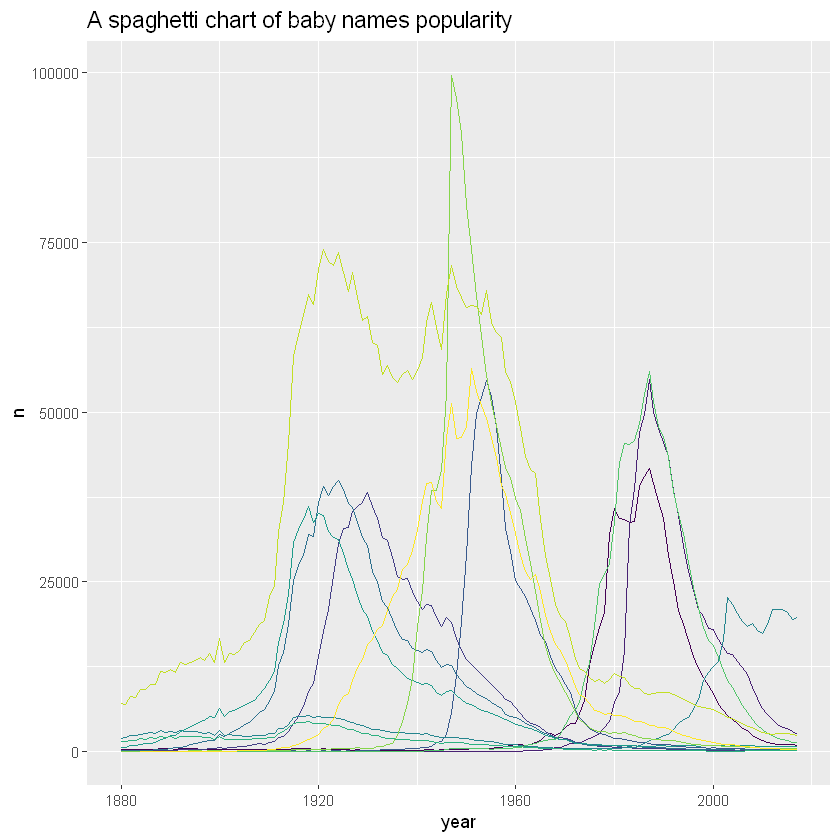

In [14]:
# Libraries
library(tidyverse)
library(hrbrthemes)
library(babynames)
library(viridis)

# 读取数据
data <- babynames %>% 
  filter(name %in% c("Mary","Emma", "Ida", "Ashley", "Amanda", "Jessica",    "Patricia", "Linda", "Deborah",   "Dorothy", "Betty", "Helen")) %>%
  filter(sex=="F")

# 绘图
data %>%
  ggplot( aes(x=year, y=n, group=name, color=name)) +
    geom_line() +
    scale_color_viridis(discrete = TRUE) +
    theme(
      legend.position="none",
      plot.title = element_text(size=14)
    ) +
    ggtitle("A spaghetti chart of baby names popularity")

您可能想突出您的主要观点，而不是向您的观众展示此图形。那么只展示某个变量数据更有意义：

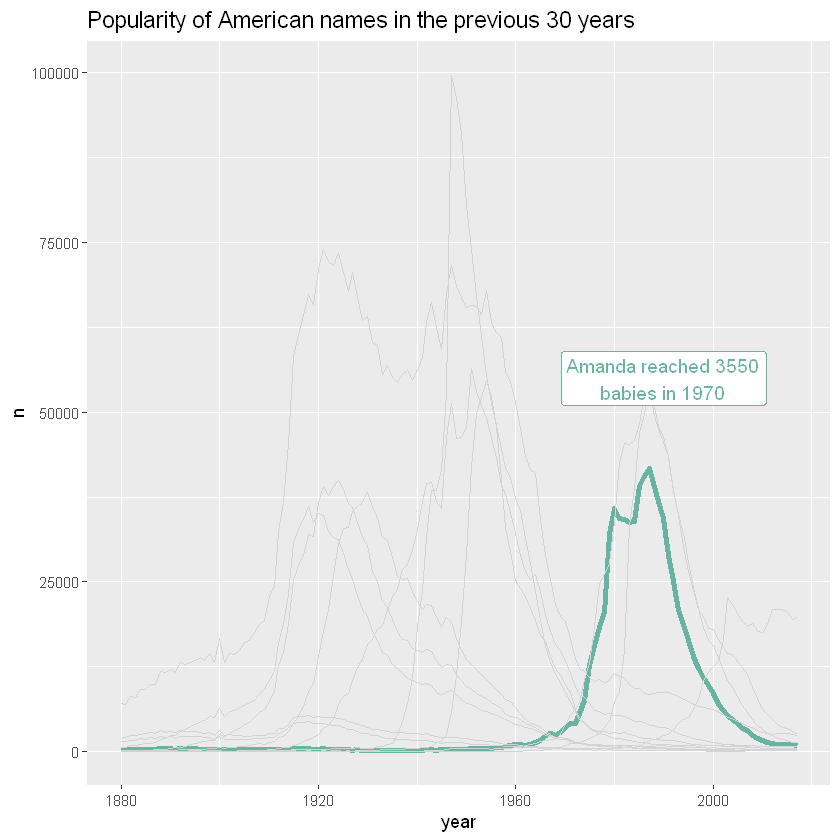

In [15]:
data %>%
  mutate( highlight=ifelse(name=="Amanda", "Amanda", "Other")) %>%
  # color设置特定数据
  ggplot( aes(x=year, y=n, group=name, color=highlight, size=highlight)) +
    geom_line() +
    scale_color_manual(values = c("#69b3a2", "lightgrey")) +
    scale_size_manual(values=c(1.5,0.2)) +
    theme(legend.position="none") +
    ggtitle("Popularity of American names in the previous 30 years") +
    geom_label( x=1990, y=55000, label="Amanda reached 3550\nbabies in 1970", size=4, color="#69b3a2") +
    theme(
      legend.position="none",
      plot.title = element_text(size=14)
)

## 示例2

当你向观众展示几个图形。报告由以下部分组成：1个barplot图显示公司的五个产品总量，1个折线图显示在过去十年被这五种款产品所产生的利益的演变：

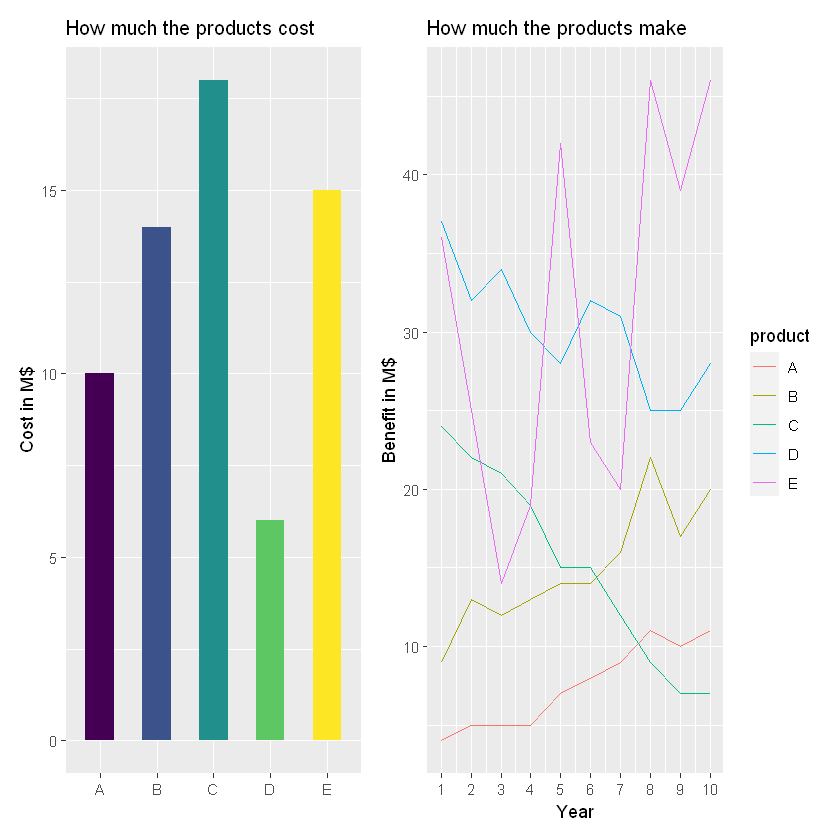

In [16]:
# 读取库
library(tidyverse)
library(hrbrthemes)
library(patchwork)
library(viridis)

# 创建数据
data <- data.frame(
  product = LETTERS[1:5],
  value = c(10, 14, 18, 6, 15)
)

# 绘图
a <- data %>%
  ggplot( aes(x=product, y=value, fill=product)) +
    geom_bar(stat="identity", width=0.5) +
    scale_fill_viridis(discrete=TRUE) +
    ggtitle("How much the products cost") +
    theme(
      plot.title = element_text(size=12),
      legend.position = "none"
    ) +
    xlab("") +
    ylab("Cost in M$")

# 创建数据
data <- data.frame(
  year = rep( seq(1,10), 5 ),
  product = rep(LETTERS[1:5], each=10 ),
  value = c( 
    seq(1,10) + sample( 1:3, 10, replace = TRUE), 
    seq(5,14) + sample( 4:10, 10, replace=TRUE), 
    seq(10,1)*2 + sample( 3:5, 10, replace=TRUE), 
    seq(20,11) + sample( 12:17, 10, replace=TRUE), 
    seq(1,10) + sample( 40:10, 10))
)

# 绘图
b <- data %>%
  ggplot( aes(x=year, y=value, color=product)) +
    geom_line() +
    scale_color_discrete() +
    scale_x_continuous(breaks=c(1:10)) +
    ggtitle("How much the products make") +
    theme(
      plot.title = element_text(size=12)
    ) +
    xlab("Year") +
    ylab("Benefit in M$")

# Show
a + b

可以看到，很难在两个图表之间建立联系，因为每个图表使用的调色板是不同的。产品A在左侧图形中为深紫色，在右侧图形中为红色。因此当您有多个图形时，在整个报告中为同一项目使用相同的颜色。

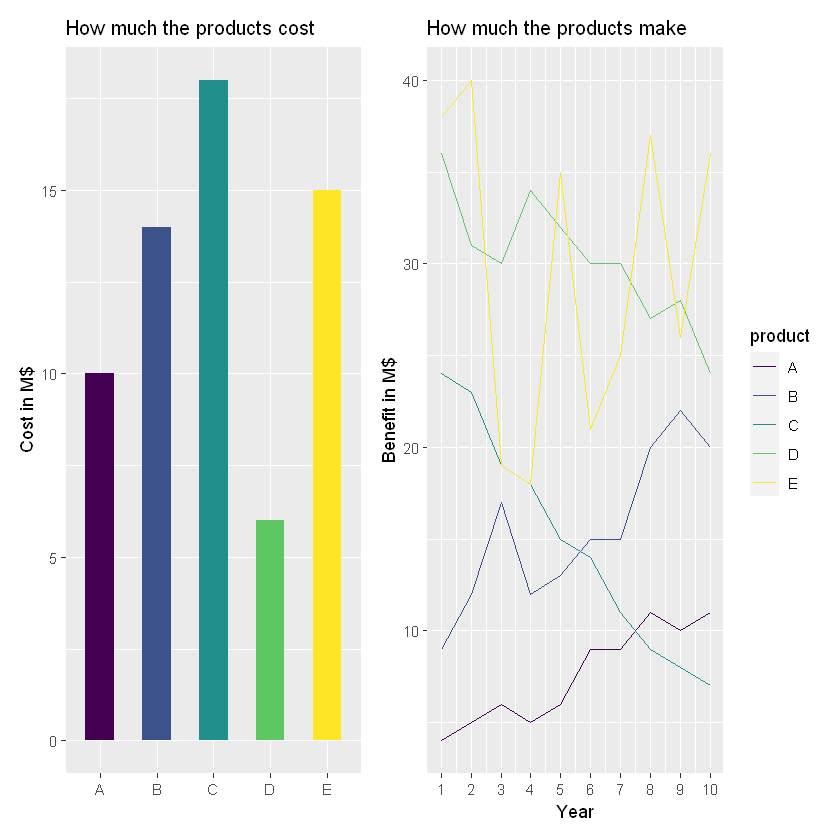

In [17]:
data <- data.frame(
  product = LETTERS[1:5],
  value = c(10, 14, 18, 6, 15)
)

a <- data %>%
  ggplot( aes(x=product, y=value, fill=product)) +
    geom_bar(stat="identity", width=0.5) +
    scale_fill_viridis(discrete=TRUE) +
    ggtitle("How much the products cost") +
    theme(
      plot.title = element_text(size=12),
      legend.position = "none"
    ) +
    xlab("") +
    ylab("Cost in M$")

data <- data.frame(
  year = rep( seq(1,10), 5 ),
  product = rep(LETTERS[1:5], each=10 ),
  value = c( 
    seq(1,10) + sample( 1:3, 10, replace = TRUE), 
    seq(5,14) + sample( 4:10, 10, replace=TRUE), 
    seq(10,1)*2 + sample( 3:5, 10, replace=TRUE), 
    seq(20,11) + sample( 12:17, 10, replace=TRUE), 
    seq(1,10) + sample( 40:10, 10))
)

b <- data %>%
  ggplot( aes(x=year, y=value, color=product)) +
    geom_line() +
    scale_color_viridis(discrete=TRUE) +
    scale_x_continuous(breaks=c(1:10)) +
    ggtitle("How much the products make") +
    theme(
      plot.title = element_text(size=12)
    ) +
    xlab("Year") +
    ylab("Benefit in M$")

# Show
a + b


## 示例3

图形的宽度与高度的比率。它可以对从您的图形中获得的见解产生重大影响。

下图是一个折线图示例，其中显示了从 1749 年到 1983 年的年度太阳黑子数量。在太阳活动周期是这个数字相当明显。太阳黑子数量遵循太阳活动的这种 11 年周期性变化，使这条线有规律地上下波动。很明显，一些峰值高于其他峰值，最大平滑太阳黑子数在 50 到 180 之间。

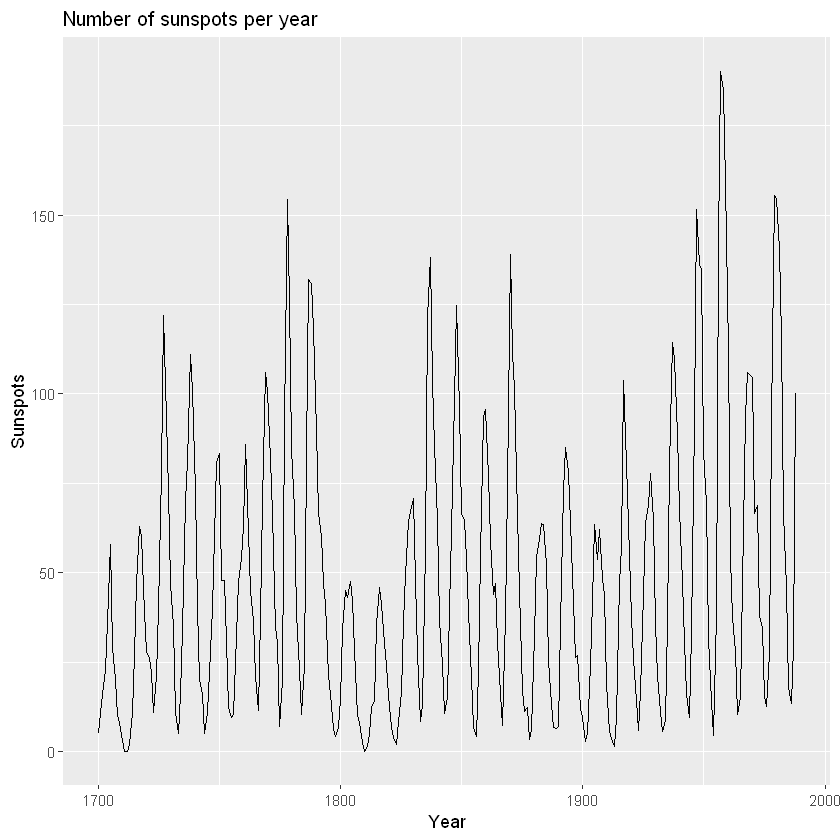

In [18]:
library(tidyverse)
library(hrbrthemes)

# 读取数据
data <- data.frame(
  Year = as.numeric(time(sunspot.year)),
  Sunspots = as.numeric(sunspot.year)
)

# 绘图
data %>%
  ggplot( aes(x=Year, y=Sunspots)) +
    geom_line() +
    ggtitle("Number of sunspots per year") +
    theme(
      plot.title = element_text(size=12)
    )

现在让我们改变这个图形的纵横比，使它更宽和更低。为了夸大效果，将图形放大到1800年到1900年。这里可以看到新的结果。太阳黑子数量增加的速度快于减少的速度。因此尝试几种不同的纵横比。这种探索极大地提高了图形的价值：

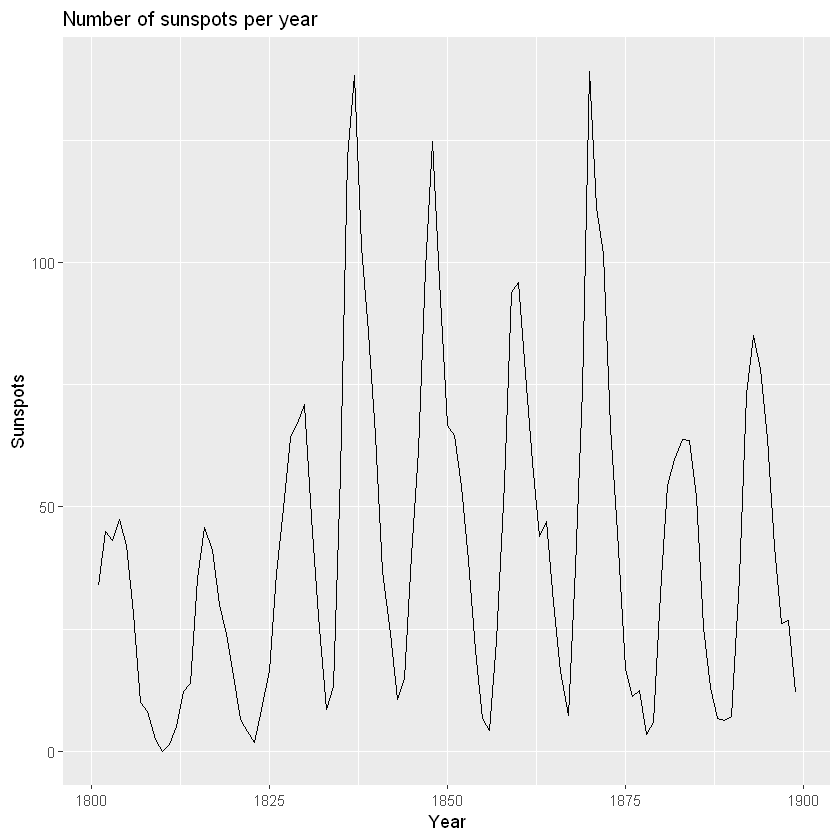

In [19]:

data %>%
  filter(Year>1800 & Year<1900) %>%
  ggplot( aes(x=Year, y=Sunspots)) +
    geom_line() +
    ggtitle("Number of sunspots per year") +
    theme(
      plot.title = element_text(size=12)
    )

## 参考

+ [ANNOTATION IS CRUCIAL FOR YOUR DATAVIZ](https://www.data-to-viz.com/caveat/annotation.html)
+ [MIND THE ASPECT RATIO](https://www.data-to-viz.com/caveat/aspect_ratio.html)
+ [MENTAL ARITHMETIC IN DATAVIZ](https://www.data-to-viz.com/caveat/mental_calculation.html)